## Names 
* Abdelaziz Salah Mohammed  BN: 2 Sec: 2
* Ahmed Hosny BN:2 Sec: 1


### Assignment Analysis: 
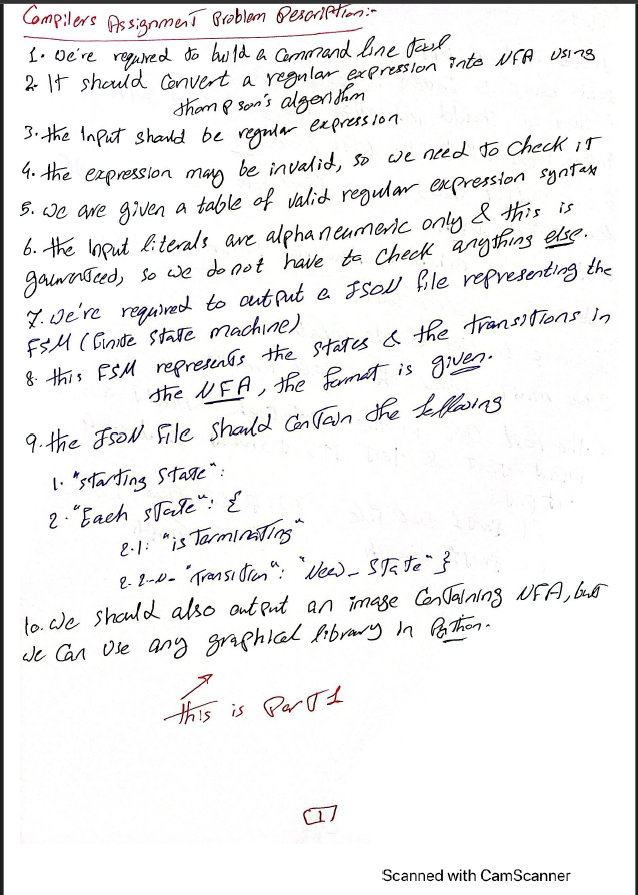
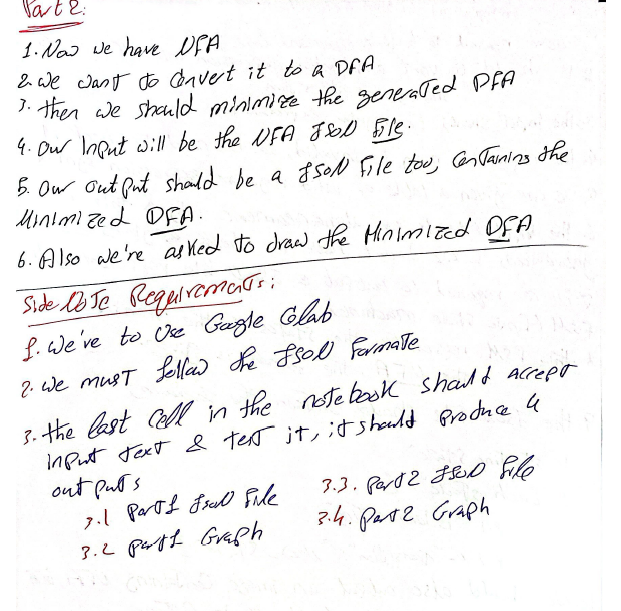

## Validation Hand Analysis: 
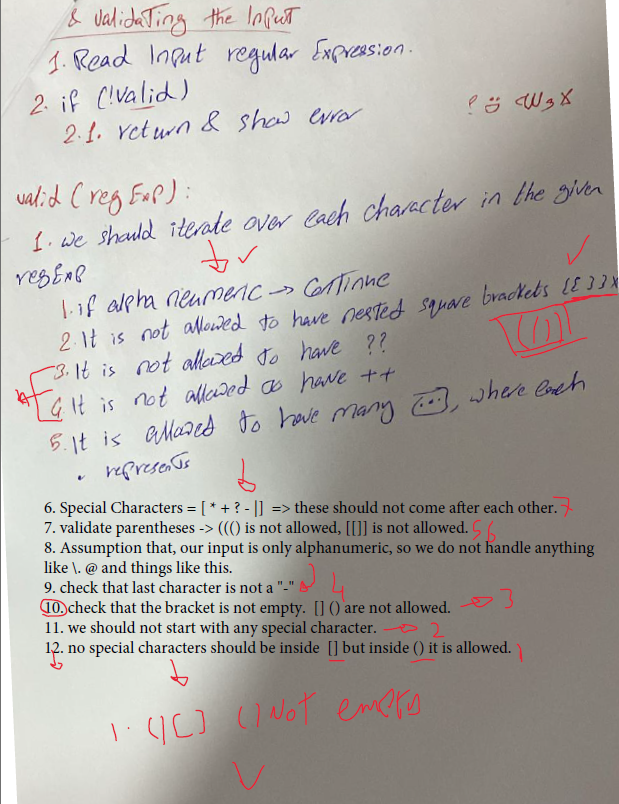

## Validation Code: 

In [393]:
from collections import deque

class Validation:
    def __init__(self):
        print('calling validation')
        self.special_char = {char: 1 for char in ['+', '|', '?', '*','-']}
        self.alphanumeric_char = {char: 1 for char in 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.'}
        self.paranteses = {char: 1 for char in ['(', ')', '[', ']']}

    def empty_expression(self,expression):
        '''
            this returns true if the given expression is empty.
        '''
        return len(expression) == 0

    def valid_starting_char(self,expression):
        '''
            this returns false, if the expression starts with special characters, or any undefined characters.
        '''
        return (expression[0] in self.paranteses) or ( expression[0] in self.alphanumeric_char)

    def no_sequence_of_special_char(self,expression):
        '''
            this returns false if there is any sequence of special characters such as
                **
                ??
                +++
                +*
                *+
                ||
                ?+
                |?
                a+? -> i would prevent such cases
                a*? -> i would prevent such cases
            take care of these cases:
              a+|
              a?|
             because it is a valid case.

        '''
        # [[]] handeled in valid parantheses
        # (()) allowed
        sequenceExist=False
        lastChar = ''
        for char in expression:
            if char in self.special_char :
                if sequenceExist:
                    if lastChar == char: # any two special characters are not allowed to be repeated.
                        return False
                    # the only two allowed cases are +| *| +? *?
                    if char == '|':
                        if lastChar == '-':  # this is the only not allowed case, because we checked above on the ||
                            return False
                    # if char == '?':
                    #     if lastChar in ['|', '-']:
                    #         return False
                    if char in ['*', '+','?']:
                       return False

                sequenceExist = True
                lastChar = char
            else:
                sequenceExist = False
        return True

    def no_end_with_dash_or_pip(self, expression):
        if expression[-1] == '-' or expression[-1] == '|':  #new
            return False
        for i,char in enumerate(expression):
            if char == ']' or char == ')':
                if expression[i-1] == '-' or expression[i-1] == '|':
                    return False
            if char == '[' or char == '(':
                if expression[i+1] == '-' or expression[i+1] == '|':
                    return False
        return True

    def no_special_char_in_parantheses(self, expression):
        rounded_brackets=False
        new_special_char = {char: 1 for char in ['+', '|', '?', '*']}
        paranthes=False
        prev_paranthes=False
        for i,char in enumerate(expression):
            if rounded_brackets and char == '-' and not paranthes:
                return False
            if char == '[':
                prev_paranthes = True
                paranthes = True
            elif char == ']':
                paranthes = False
                prev_paranthes = False
            # check () doesn't start with special char      #new
            elif char == '(':
                paranthes=False
                rounded_brackets = True
                if(expression[i+1] in self.special_char):
                    return False
            elif char == ')':
                rounded_brackets = False
                paranthes=prev_paranthes
            if paranthes and char in new_special_char:
                return False



        return True

    def validate_parentheses(self, expression: str) -> bool:
        '''
        This function validates the parentheses in the expression.
        It returns True if the parentheses are valid, otherwise it returns False.
        The parantheses are valid in the following cases:
            1. no empty parentheses either [] or ()
            2. # of '(' == # of ')' and in a correct order, same for [].

        Input:
            expression: str
        Output:
            bool
        '''
        stack = deque()
        for i ,char in enumerate(expression):
            if char == '(' or char == '[':
                if i+1 >= len(expression) or expression[i+1] == ')' or expression[i+1] == ']':
                    return False
                stack.append(char)
            elif char == ')':
                if len(stack) == 0 or stack.pop() != '(' :
                    return False

            elif char == ']':
                if len(stack) == 0 or stack.pop() != '[' :
                    return False

        return len(stack) == 0

    def validate_no_neasted_square_brackets(self, expression:str) -> bool:
        '''
        This function validates the square brackets in the expression.
        It returns True if the square brackets are valid, otherwise it returns False.
        The square brackets are valid in the following case:
            1. no nested square brackets.

        Input:
            expression: str
        Output:
            bool
        '''
        stack = deque()
        for char in expression:
            if char == '[':
                if len(stack) != 0: # this mean that there is a nested square bracket.
                    return False
                stack.append(char)
            elif char == ']':
                if len(stack) == 0 or stack.pop() != '[':
                    return False
        return len(stack) == 0

    def validate_regular_expression(self, expression: str) -> bool:
        '''
            This is the main validation function, which calls all the above utility validation functions.

            Sequence of validation:
                1. empty
                2. valid starting character
                3. parentheses
                    3.1. no empty parentheses and valid parentheses.
                    3.2. no nested square brackets
                4. no special characters inside the parentheses.
                5. no sequence of special characters
                6. no end with dash or pipe



        '''
        if self.empty_expression(expression):
            return False

        if not self.valid_starting_char(expression):
            return False

        if not self.validate_parentheses(expression):
            return False

        if not self.validate_no_neasted_square_brackets(expression):
            return False

        if not self.no_special_char_in_parantheses(expression):
            return False

        if not self.no_sequence_of_special_char(expression):
            return False

        if not self.no_end_with_dash_or_pip(expression):
            return False

        # it passed all tests.
        print("Passed all test cases 🥂🥳")
        return True




## (1) Lexer
* This Component is responsible for breaking the input into tokens.
* And it escape all spaces and newlines.
* and we implemented it mainly for 2 reasons:
    1. We will need to do parsing, and parsing on raw characters is ugly

    2. (Optional) We will need to handle escapes :
     Suppose you want to match the literal string '(', how
     would you do it ?
     If your regex engine doesn't handle escapes, you
     can't, but with escapes it's simply the regex "\("

In [394]:
# First of all we need to define all the tokens' types
DEBUG = True
from enum import Enum
class TokenTypes(Enum):
    OR = 1
    Astrisk = 2
    Plus = 3
    QuestionMark = 4
    OpenSquareBracket = 5
    ClosedSquareBracket = 6
    OpenBracket = 7
    ClosedBracket = 8
    Hiphen = 9
    Dot = 10
    LiteralChar = 11

In [395]:
# now we need to define a class for the tokens
class Token:
    def __init__(self, tokenType, value):
        self.tokenType = tokenType
        self.value = value # the string value of the token, and is used in case of LiteralChar.

# we need to define a class for token stream, and a pointer, which is initialized to 0, because they will be used later by the
class TokenStream:
    def __init__ (self, tokenStream = [],tokenPointer=0):
        self.tokenStream = tokenStream
        self.tokenPointer = tokenPointer
    def resetStream (self):
        self.tokenStream = []
        self.tokenPointer = 0
    def advanceTokenPointer(self):
        self.tokenPointer += 1
    def getCurrentToken(self):
        return self.tokenStream[self.tokenPointer]


In [396]:
# Now lets implement the Lexer Class
class Lexer:
    @staticmethod
    def lexReg(regex:str):
        '''
            This function is responsible for lexing the regular expression and returning a list of tokens.
            Input:
                regex: a string representing the regular expression.
            Output:
                a list of tokens.
        '''
        # create a map which maps each character to its corresponding token type.
        conversionMap = {
            '|': TokenTypes.OR,
            '*': TokenTypes.Astrisk,
            '+': TokenTypes.Plus,
            '?': TokenTypes.QuestionMark,
            '[': TokenTypes.OpenSquareBracket,
            ']': TokenTypes.ClosedSquareBracket,
            '(': TokenTypes.OpenBracket,
            ')': TokenTypes.ClosedBracket,
            '-': TokenTypes.Hiphen,
            '.': TokenTypes.Dot
            # LiteralCharacters are any other characters that are not in the map.
        }

        # define spaceChar and escapeChar
        spaceChar = ' '
        escapeChar = '\\'

        # initialize an empty token stream
        tokens = TokenStream()
        tokens.resetStream()

        # we will need to use two pointers approach, one holds the previous character, and the other holds the current character.
        previousChar = None
        for char in regex :
            # skip all spaces
            if char == spaceChar:
                continue
            # mark escapes
            if char == escapeChar:
                # if the previous character is escape character, then we need to add the current character as a LiteralChar token.
                if previousChar == escapeChar:
                    tokens.tokenStream.append(Token(TokenTypes.LiteralChar, char))
                    # clear the mark.
                    previousChar = None
                    continue
                # else, then we are preparing ourself to escape the next character.
                previousChar = char
                continue
            # check if the current character is in conversionMap and not preceeded with space
            if char in conversionMap and previousChar != escapeChar:
                # add the current character to the token stream
                tokens.tokenStream.append(Token(conversionMap[char], char))
            else:
                # in this case we are trying to match the exact symbol, so we need to add it as a LiteralChar token.
                tokens.tokenStream.append(Token(TokenTypes.LiteralChar, char))
            previousChar = char
        return tokens




In [397]:
# Lets Test the Lexer
def testLexer():
    # regex = 'a?b(cd|ef)[a-z]'

    regex = 'ab*c+de?(f|g|h)|mr|n|[pq]' #\\
    tokens = Lexer.lexReg(regex)
    for token in tokens.tokenStream:
        print(token.tokenType, token.value)

testLexer()


TokenTypes.LiteralChar a
TokenTypes.LiteralChar b
TokenTypes.Astrisk *
TokenTypes.LiteralChar c
TokenTypes.Plus +
TokenTypes.LiteralChar d
TokenTypes.LiteralChar e
TokenTypes.QuestionMark ?
TokenTypes.OpenBracket (
TokenTypes.LiteralChar f
TokenTypes.OR |
TokenTypes.LiteralChar g
TokenTypes.OR |
TokenTypes.LiteralChar h
TokenTypes.ClosedBracket )
TokenTypes.OR |
TokenTypes.LiteralChar m
TokenTypes.LiteralChar r
TokenTypes.OR |
TokenTypes.LiteralChar n
TokenTypes.OR |
TokenTypes.OpenSquareBracket [
TokenTypes.LiteralChar p
TokenTypes.LiteralChar q
TokenTypes.ClosedSquareBracket ]


# (2) Regex_Parser

* Parser is a program that takes a sequence of tokens and produces a parse tree.
* but why do we need a parse tree?
* The parse tree is a visual representation of the syntax of a program. It shows the structure of the program and how the different parts of the program relate to each other.
* Moreover, it allow us to keep the precedence of the elements in the expression, consider this case:
  * 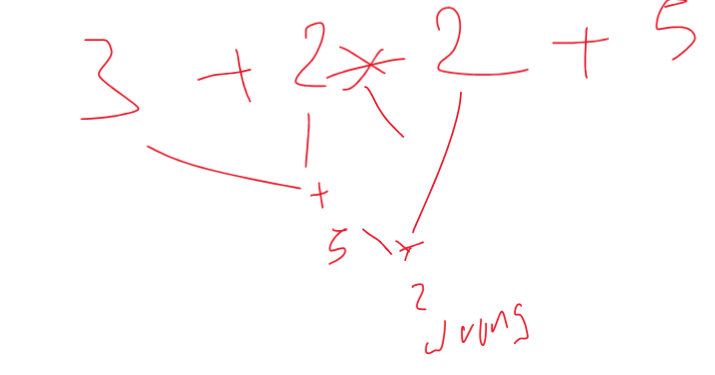
* In this case, if we used the naive approach, and moved from the beginning of the string, and just apply operations as we detects it, we will get a wrong result, because we shouldn't add 1 to 2, aw 2 should be firstly multiplied by its rightsside.
* If we handled it as a string, we will make mistakes for sure.
* So now it makes sense to implement a parser, but how to do that?
* We have an algorithm called Recursive Descent Parser, which is a top-down parser that uses a set of recursive procedures to process the input.
* its steps are as follows:
  * Define your AST-Node el node 3ndk shaklha 3aml ezay -> pointer msln w character w hakaza.
  * b3den le kol operation 3ndk, m7tag te3ml class by-inheret mn el AST Node de.
  * ie: Or-AST-Node should be a node with two children, left and right, and its logic is that we consider only one of the children to be true, and the other is false.
  * ie: Sequence-AST-Node should be a node with two children, left and right, and its logic is that we should execute the left child first, then the right child.
  * and so on till we cover all the cases
  * then define a leaf node -> Literal-Character-AST nodes, which is a node that has a value, and it is the end of the tree.
* After defining our hirarechal datastructure, we need to define a grammar to parse
* This is a method called Backus-Naur
  * 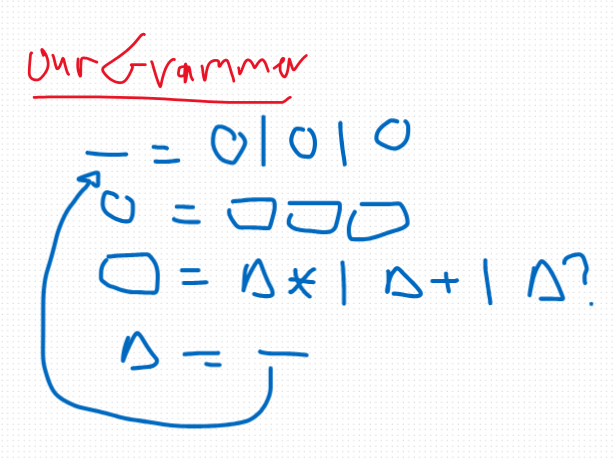
  * Our grammar should be in such hirarechal way.
      * we regex-expression : regex_or_expression
      * regex-or-expr ::= regex-seq-expr (OR_TOKEN regex-seq-expr)*
      * regex-seq-expr ::= regex-quantified-expr (regex-quantified-expr)*
      * regex-quantified-expr ::= regex-base-expr (STAR_TOKEN | PLUS_TOKEN | QUESTION_MARK_TOKEN)?
      * regex-base-expr ::= LITERAL_CHAR_TOKEN  | [OPEN_SQUARE_BRACKET_TOKEN  square-bracket-content CLOSED_SQUARE_BRACKET_TOKEN ]| (OPEN_PARENTHESIS_TOKEN regex-expr CLOSED_PARENTHESIS_TOKEN )
      * square-bracket-content ::= square-bracket-element+
      * square-bracket-element ::= LITERAL_CHAR_TOKEN
      * | LITERAL_CHAR_TOKEN DASH LITERAL_CHAR_TOKEN
* Now we need a code to implement this, Recursive descent says that, it is very easy to implement this grammar, by defining a function for each non-terminal in the grammar, and then call the functions recursively to parse the input.
* steps:
  1. htbd2 t3ml function le kol element fe el grammar, ie: ehna olna 3ndna regex-exepression, yeb2a te3ml function esmha keda, w t5leha tnfzz bzbt elly enta katbu, fa keda el regExp => regex_or_expr(regex)
  2. w b3den tbd2 t3ml implementation lel regex_or_expr bnfs el tre2a, w tfdl keda l7d ma tewsl lel final literals.

# Procedures flow
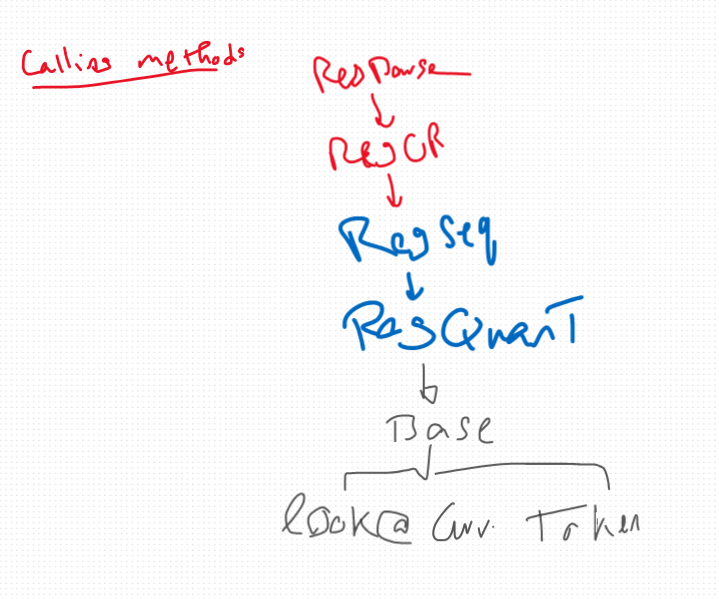

### Enough Talking, lets start implementing the code

In [398]:
# First we need to define our AST Nodes
class AstNode:
    pass # this is an abstract class

'''
    What are our cases?
        1. + -> One or more node class
        2. * -> Zero or more node class
        3. ? -> Zero or one class
        4. | -> OR class
        5. [] -> set of characters class
        6. abcd -> Sequence of characters class
        7. LiteralChar -> Literal Character class
'''
class PlusNode(AstNode):
    left: AstNode
    val: str
    def __init__(self, left):
        self.left = left
        self.val = '+'

class AstriskNode(AstNode):
    left: AstNode
    val: str
    def __init__(self, left):
        self.left = left
        self.val = '*'


class QuestionMarkNode(AstNode):
    left: AstNode
    val: str
    def __init__(self, left):
        self.left = left
        self.val = '?'
class OrNode(AstNode):
    left: AstNode
    right: AstNode
    val:str
    def __init__(self, left, right):
        self.left = left
        self.right = right
        self.val = '|'

class SetOfCharactersNode(AstNode):
    val:str
    characters: set  # maybe strings or pairs as in case of [0-9]
    def __init__(self, characters):
        self.characters = characters
        self.val = '&'

class SequenceOfCharactersNode(AstNode):
    left: AstNode
    right: AstNode
    val: str
    def __init__(self, left, right):
        self.left = left
        self.right = right
        self.val = '&'

class LiteralCharNode(AstNode):
    value: str
    def __init__(self, value):
        self.value = value


### now lets define our grammar

1. parse -> parseReg
2. parseReg -> parseOr
2. parseOr -> parseSeq (| parseSeq)*
2. parseSeq -> parseQuantified (parseQuantified)*
2. parseQuantified -> parseBase (+ | * | ?)?
2. parseBase -> LiteralChar | SetOfCharacters | ( parseReg )
2. so we just need to implement one function for each of those following the recursive descent parsing approach.


In [399]:
# 1. parseBase -> because it is our basecase, so we must implement the functions bottom up.
def parseSquareBrackets(tokenStream, tokenIdx):
    '''
        Our content may have different patterns:
            1. a-z -> one range
            2. abc0-9 -> certain Literals and a range
            3. xyz -> certain Literals
            4. A-Z0-9 multiple Ranges
            5. all above.
        how to handle them?
        1. any range should be treated as a tuple of 2 characters
            first is the starting index
            second is the ending index.
        2. any sequence of characters
    '''
    characters = []
    prevIsDash = False
    # We Should iterate till we find a ] <=
    while tokenStream[tokenIdx].tokenType != TokenTypes.ClosedSquareBracket:
        if tokenStream[tokenIdx].tokenType == TokenTypes.Hiphen:
            prevIsDash = True
        elif prevIsDash:
            # get the last appended char as the starting character
            startingChar = characters.pop()
            # get the current character as an ending character
            endingChar = tokenStream[tokenIdx].value
            # push in the characters a tuple
            characters.append((startingChar, endingChar))
            # set the prevIsDash back to False
            prevIsDash = False
        elif tokenStream[tokenIdx].tokenType == TokenTypes.LiteralChar:
            characters.append(tokenStream[tokenIdx].value)
        tokenIdx += 1

    # here we should assign it to set, but I left it as List.
    return SetOfCharactersNode(characters), tokenIdx

def parseBase(tokenStream, tokenIdx):
    '''
        This function is responsible for parsing the base cases, or applying a recursive call on bracktes
        Implmenting this grammar:  parseBase -> LiteralChar | SetOfCharacters | ( parseReg )

        Input:
            tokenStream: a list of tokens.
            tokenIdx: the current index of the token.
        Output:
            an AST node, and the new index
    '''

    # we have three cases, LiteralChar, SetOfCharacters, and ( parseReg )

    # Extracting the token
    token:Token = tokenStream[tokenIdx]
    tokenIdx += 1


    # LiteralChar
    if token.tokenType == TokenTypes.LiteralChar:
        node, idx = LiteralCharNode(token.value), tokenIdx

        return node, idx

    # set of Characters.
    if token.tokenType == TokenTypes.OpenSquareBracket:
        sq, idx = parseSquareBrackets(tokenStream, tokenIdx)
        # we need a utility function to parse the data inside the square brackets.
        return sq, idx+1 # we need to skip the closed square bracket.

    if token.tokenType == TokenTypes.OpenBracket:
        # we need to parse the regular expression inside the brackets.
        parsedReg, tokenIdx =  parseRegex(tokenStream, tokenIdx)
        return parsedReg, tokenIdx+1 # we need to skip the closed bracket.


In [400]:
def parseQuantified(tokensStream, tokenIdx):
    '''
        This function is responsible for parsing the quantified cases.
        it implements this grammar:
            parseQuantified -> parseBase (+ | * | ?)?
    '''

    # first we assume that we have only one operand
    leftOperand, tokenIdx = parseBase(tokensStream, tokenIdx)
    # print(leftOperand, tokenIdx)

    # now we need to check if there are more operands
    if tokenIdx >= len(tokensStream):
        # no more operands, just return the leftOperand
        return leftOperand, tokenIdx

    # now we have to check on the operator (*,+,?)
    token = tokensStream[tokenIdx]
    # print('the current token is: ' + token.value)
    '''
        el moshkela btb2a hena, enu byb2a shayef b, w de msh btb2a wla haga mn el t7t dol
    '''
    if token.tokenType == TokenTypes.QuestionMark:
        return QuestionMarkNode(leftOperand), tokenIdx + 1
    if token.tokenType == TokenTypes.Plus:
        return PlusNode(leftOperand), tokenIdx + 1
    if token.tokenType == TokenTypes.Astrisk:
        return AstriskNode(leftOperand), tokenIdx + 1

    # if we reached here, this implies that we finished the quantifiers.
    return leftOperand, tokenIdx



In [401]:
def parseSequence(tokensStream, tokenIdx):
    '''
        This function is responsible for parsing the sequence of characters.
        it implements this grammar:
            parseSequence -> parseQuantified (parseQuantified)*
    '''
    # first we assume that we have only one operand
    leftOperand, tokenIdx = parseQuantified(tokensStream, tokenIdx)

    # now we need to check if we have more elements
    if tokenIdx >= len(tokensStream):
        # no more elements
        return leftOperand, tokenIdx

    # we need to continue parsing all sequence like abcd, or if we have operator we should also stop.
    # to do so, we have to have a stoping condition
    # we will stop if we have a closed bracket, or an OR operator.
    while tokenIdx < len(tokensStream) and tokensStream[tokenIdx].tokenType not in [TokenTypes.OR, TokenTypes.ClosedBracket]:
        rightOperand, tokenIdx = parseQuantified(tokensStream, tokenIdx) # token index is incremented here implecitly.
        leftOperand = SequenceOfCharactersNode(left=leftOperand,right= rightOperand) # recursive assignment, cascading the elemets in the leftOperand.
    return leftOperand, tokenIdx


In [402]:
def parseOr (tokensStream, tokenIdx):
    '''
        This function is responsible for parsing the OR operator.
        it implements this grammar:
            parseOr -> parseSequence (| parseSequence)*
    '''
    # first we assume that we have only one operand
    leftOperand, tokenIdx = parseSequence(tokensStream, tokenIdx)

    # now we need to check if we have more elements
    if tokenIdx >= len(tokensStream):
        return leftOperand, tokenIdx

    # now we still have elements, we just need to do recursion, as we see or operator
    while tokenIdx < len(tokensStream) and tokensStream[tokenIdx].tokenType == TokenTypes.OR:
        rightOperand, tokenIdx = parseSequence(tokensStream, tokenIdx+1)
        leftOperand = OrNode(left =leftOperand,right= rightOperand)

    return leftOperand, tokenIdx

In [403]:
def parseRegex (tokensStream, index):
    '''
        This function should implement the grammar:
            parseReg -> parseOr
    '''
    return parseOr(tokensStream, index)

In [404]:
def parse(tokensStream):
    expression, _ = parseRegex(tokensStream, 0)
    return expression

In [405]:
# Its time to test our logic.
# regex = 'ab*c+de?(f|g|h)|mr|n|[pq]'
# regex = 'a+b' # this is similar to this (a+ . b) so it should be => a+b.
regex = '(A+B*)?(C|D)'
tokens = Lexer.lexReg(regex)
ast:AstNode = parse(tokens.tokenStream)

# print a tree from left to right
def printTree(node, level=0):
    if node is None:
        return
    if node.__class__.__name__ == 'SetOfCharactersNode':
        print('   '*level + str(node.characters))
        return
    if node.__class__.__name__ == 'LiteralCharNode':
        print('   '*level + node.value)
        return
    if(node.left):
       printTree(node.left, level+1)
    print('\t' * level + str(node))
    # print('   '*level + str(node.__class__.__name__))
    if node.__class__.__name__ in ['AstriskNode', 'PlusNode', 'QuestionMarkNode']:
        # all of these has no right operands.
        return
    if(node.right):
        printTree(node.right, level+1)

printTree(ast)


            A
            B
      C
      D


### Converting recursive descent to postfix string
> We used this step, because we found that shunting yard is better to be implemented than recursive descent.

### Conversion algorithm:
1. function convertToPostfix(node):
   1. if node is operand:
      1.  output(node.value)
    2. else if node is operator:
       1. for each child in node.children:
            1. convertToPostfix(child)
        2. output(node.value)


In [406]:
postfixString = ''
def convertRecursiveDescentToPostfix (root: AstNode, postfixString:str):
    # if no node.
    if root == None:
        return postfixString

    # if it was terminal character
    if root.__class__.__name__ == 'LiteralCharNode':
        postfixString += root.value
        return postfixString

    # if set of characters, add them as or operands
    if root.__class__.__name__ == 'SetOfCharactersNode':
        notFirstChar = False
        for element in root.characters: # in case of range => [0-9] and so on.
            if type(element) == tuple:
                startRange = element[0]
                endRange = element[1]
                # now I need to iterate from the start range to the end range, and add these elements as or
                for i in range(ord(startRange), ord(endRange)+1):
                    # [0-4] => 01|2|3|4|
                    postfixString += chr(i)
                    if notFirstChar:
                        postfixString+= '|'
                    else:
                        notFirstChar = True


            else:
                postfixString += element
                if notFirstChar:
                    postfixString+= '|'
                else:
                    notFirstChar = True
                 
        return postfixString

    # if it was an Sequence or OR node
    if root.__class__.__name__ in ['OrNode', 'SequenceOfCharactersNode']:
        # apply dfs, left first
        postfixString = convertRecursiveDescentToPostfix(root.left, postfixString)
        # then right
        postfixString = convertRecursiveDescentToPostfix(root.right, postfixString)
        postfixString += root.val
        return postfixString

    # if it was any operator
    if root.__class__.__name__ in ['AstriskNode', 'PlusNode', 'QuestionMarkNode']:
        # append the character first
        postfixString = convertRecursiveDescentToPostfix(root.left, postfixString)
        # then add the operatot.
        postfixString += root.val
        return postfixString

postfixString = convertRecursiveDescentToPostfix(ast, postfixString)
print(postfixString)


A+B*&?CD|&


In [407]:
def fromRegToPostfix(regex:str) -> str:
    # 1. Validate the regex
    validator = Validation()
    if not validator.validate_regular_expression(regex):
        # throw an exception
        return 'Invalid Regex'

    # 2. Lexe it
    tokens = Lexer.lexReg(regex)

    # 3. Parse
    ast:AstNode = parse(tokens.tokenStream)
    postfixString = ''

    # 4. convert to Postfix
    postfixString = convertRecursiveDescentToPostfix(ast, postfixString)
    return postfixString



In [408]:
# assume @ is the epsilon symbol
class edge:
    def __init__(self,src,dist,label="@"):
        self.src = src
        self.dist = dist
        self.label = label

In [409]:
sid=0

class state:
    def __init__(self,edges, isTerminating = False, isStart= False):
        global sid
        self.Outedges:list[edge] = edges
        self.label = "S"+str(sid)
        self.isTerminating = isTerminating
        self.isStart = isStart
        sid+=1
    def add_edge(self,edge):
        self.Outedges.append(edge)

In [410]:
from graphviz import Digraph

class NFA:
    def __init__(self,start,accept,inner_states):
        self.start:state = start
        self.accept:state = accept
        self.inner_states:list[state] =inner_states
        self.allStates={}

    def display(self):
        with open('nfa.json', 'w') as f:
            f.write("{\n")
            f.write("\"startingState\":\""+self.start.label+"\",\n")
            for s in self.inner_states:
                f.write("\""+s.label+"\":\n")
                f.write("   {\n")
                f.write("       \"isTerminatingState\":\""+str(s.label==self.accept.label)+"\"")
                if len(s.Outedges)>0:
                    f.write(",\n")
                for e in s.Outedges:
                    f.write("       \""+e.label+"\":\""+e.dist.label+"\"")
                    if e!=s.Outedges[-1]:
                        f.write(",\n")
                    else:
                        f.write("\n")
                f.write("   }")
                if s!=self.inner_states[-1]:
                    f.write(",\n")
                else:
                    f.write("\n")
            f.write("}\n")

    def graph (self):
        dot = Digraph(comment='NFA graph',format='png',graph_attr={ 'rankdir': 'LR'})
        # dot.node(self.start.label,self.start.label,shape="circle")
        # dot.node(self.accept.label,self.accept.label,shape="doublecircle")
        for s in self.inner_states:
            if s.label==self.accept.label:
                dot.node(s.label,s.label,shape="doublecircle")
            else:
                dot.node(s.label,s.label,shape="circle")
            for e in s.Outedges:
                dot.edge(e.src.label,e.dist.label,e.label)
        dot.render('test-output/NFA.gv', view=True)



In [411]:
def Concat(stack:list[NFA]):
    if (len(stack) < 2):
        print("No enough elements")
        return stack

    nfa2:NFA = stack.pop()
    nfa1:NFA = stack.pop()

    newEdges = edge(nfa1.accept,nfa2.start)
    nfa1.accept.add_edge(newEdges)

    resNfa = NFA(nfa1.start,nfa2.accept,nfa1.inner_states+nfa2.inner_states)
    resNfa.allStates.update(nfa1.allStates)
    resNfa.allStates.update(nfa2.allStates)
    stack.append(resNfa)

    return stack

In [412]:
def Or(stack:list[NFA]):
    if (len(stack) < 2):
        print("No enough elements")
        return stack

    nfa1 = stack.pop()
    nfa2 = stack.pop()

    newStart = state([])
    # sid+=1
    newEnd = state([])
    # sid+=1

    newEdges1 = edge(newStart,nfa1.start)
    newEdges2 = edge(newStart,nfa2.start)

    newStart.add_edge(newEdges1)
    newStart.add_edge(newEdges2)

    newEdges3 = edge(nfa1.accept,newEnd)
    newEdges4 = edge(nfa2.accept,newEnd)

    nfa1.accept.add_edge(newEdges3)
    nfa2.accept.add_edge(newEdges4)

    resNfa = NFA(newStart,newEnd,nfa1.inner_states+nfa2.inner_states+[newStart,newEnd])
    resNfa.allStates.update(nfa1.allStates)
    resNfa.allStates.update(nfa2.allStates)
    stack.append(resNfa)

    return stack

In [413]:
def ZeroMore(stack:list[NFA]):
    if (len(stack) < 1):
        print("No enough elements")
        return stack
    nfa = stack.pop()

    newEdges1 = edge(nfa.accept,nfa.start)
    nfa.accept.add_edge(newEdges1)

    newStart = state([])
    # sid+=1
    newEnd = state([])
    # sid+=1

    newEdges2 = edge(newStart,nfa.start)
    newStart.add_edge(newEdges2)

    newEdges3 = edge(nfa.accept,newEnd)
    nfa.accept.add_edge(newEdges3)

    newEdges4 = edge(newStart,newEnd)
    newStart.add_edge(newEdges4)

    resNfa = NFA(newStart,newEnd,nfa.inner_states+[newStart,newEnd])
    resNfa.allStates.update(nfa.allStates)

    stack.append(resNfa)

    return stack

In [414]:
def OneMore(stack:list[NFA]):
    if (len(stack) < 1):
        print("No enough elements")
        return stack

    nfa = stack.pop()

    newEdges1 = edge(nfa.accept,nfa.start)
    nfa.accept.add_edge(newEdges1)

    newStart = state([])
    # sid+=1
    newEnd = state([])
    # sid+=1

    newEdges2 = edge(newStart,nfa.start)
    newStart.add_edge(newEdges2)

    newEdges3 = edge(nfa.accept,newEnd)
    nfa.accept.add_edge(newEdges3)

    resNfa = NFA(newStart,newEnd,nfa.inner_states+[newStart,newEnd])
    resNfa.allStates.update(nfa.allStates)
    stack.append(resNfa)

    return stack

In [415]:
def ZeroOne(stack:list[NFA]):
    if (len(stack) < 1):
        print("No enough elements")
        return stack

    nfa = stack.pop()

    newStart = state([])
    # sid+=1
    newEnd = state([])
    # sid+=1

    newEdges1 = edge(newStart,nfa.start)
    newStart.add_edge(newEdges1)

    newEdges2 = edge(nfa.accept,newEnd)
    nfa.accept.add_edge(newEdges2)

    newEdges3 = edge(newStart,newEnd)
    newStart.add_edge(newEdges3)

    resNfa = NFA(newStart,newEnd,nfa.inner_states+[newStart,newEnd])
    resNfa.allStates.update(nfa.allStates)
    stack.append(resNfa)

    return stack

In [416]:
def Construct(stack:list[NFA],s:str):

    start=state([])
    # sid+=1
    accept=state([])
    # sid+=1

    newEdges = edge(start,accept,s)
    start.add_edge(newEdges)

    resNfa = NFA(start,accept,[start,accept])
    resNfa.allStates.update({start.label:start,accept.label:accept})
    stack.append(resNfa)

    return stack

In [417]:
all_states = {}
def PostfixToNFA(postfix:str):
    alphanum = {char:char for char in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789."}
    stack = []
    for c in postfix:
        if c in alphanum:
            stack = Construct(stack,c)
        elif c == "*":
            stack = ZeroMore(stack)
        elif c == "+":
            stack = OneMore(stack)
        elif c == "?":
            stack = ZeroOne(stack)
        elif c == "&":
            stack = Concat(stack)
        elif c == "|":
            stack = Or(stack)
        else:
            print("Invalid postfix expression character {c} is not recognized")
            return None
    if len(stack)!=1:
        print("Invalid postfix expression")
        return None

    result = stack.pop()

    return result

In [418]:
# test cell
# expression = "(A+B*)?(C|D)"
# postfix = "A+B*.?CD|."
# regex = '[0-2]'
regex="abc|d"
postfix= fromRegToPostfix(regex)
print(postfix)
if postfix == 'Invalid Regex':
    print('Invalid Regex')
    exit(-1)
nfa = PostfixToNFA(postfix)
nfa.start.isStart = True
nfa.accept.isTerminating = True
print(type(nfa))
nfa.display()
nfa.graph()


calling validation
Passed all test cases 🥂🥳
ab&c&d|
<class '__main__.NFA'>


## Here we should apply NFA to DFA

### Subset Hand Analysis:
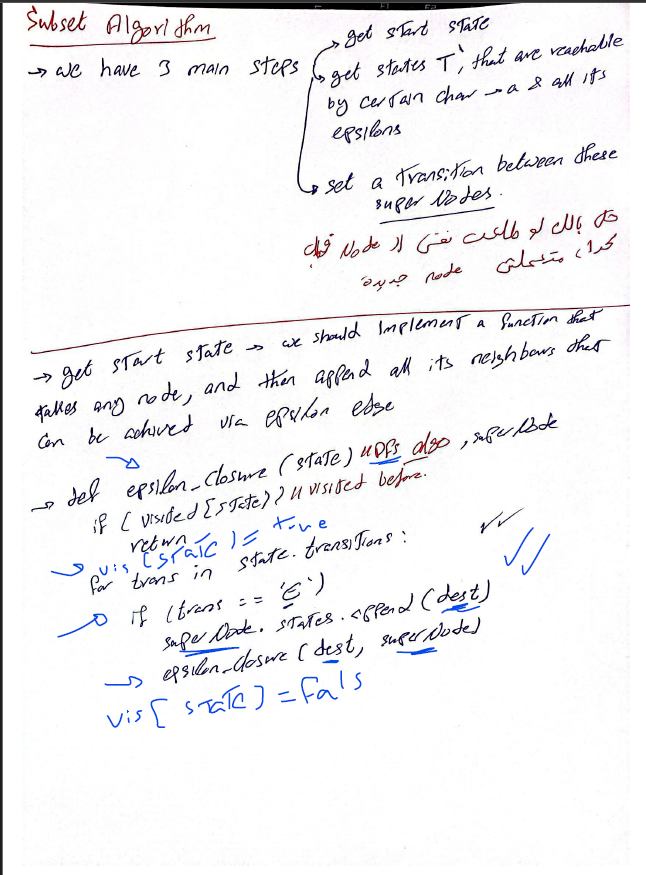
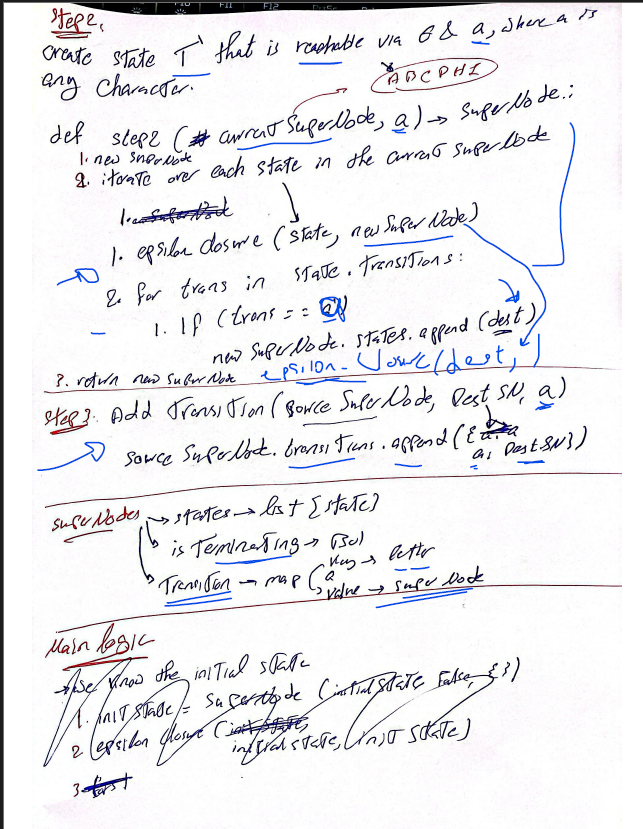
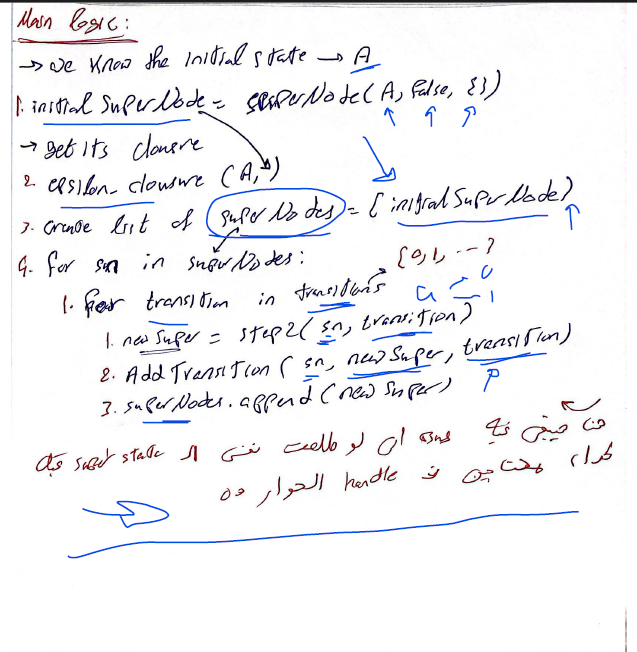

### Subset construction algorithm:
1. Create the initial state of the DFA by taking the closure of the NFA's initial state.
2. For each state in the DFA, and for each possible input symbol:
    1. Apply the NFA's transition function to the states in the DFA to determine the next state.
    2. Take the closure of the set of states obtained in the previous step.
    3. This set of states is the next state of the DFA.
    4. Add this transition to the DFA.
    5. If the next state is not already in the DFA, add it to the DFA.
    6. Repeat steps 2-5 until all states in the DFA have been processed.
    7. The final states of the DFA are those that contain a final state of the NFA.
    8. The initial state of the DFA is the set of states containing the initial state of the NFA.
    9. The alphabet of the DFA is the same as the alphabet of the NFA.

In [419]:
'''
    Create a class called dumbState, its attribute are
        1. state: the state itself
        2. isTerminating: a boolean to indicate if the state is terminating or not.
        3. transition:
            it should be a map
                its key is the label
                its value is the destination state.
'''
class dumbState:
    def __init__(self, state, isTerminating, transitions = {}, isStarting = False):
        self.state = state
        self.isStarting = isStarting
        self.isTerminating = isTerminating
        self.transitions = transitions

    def addTransition(self, label, destination):
        self.transitions[label] = destination

'''
    Create a class of superNode, which hold a list of dumbStates, and wethere it is a terminating state or not.
    Also it should carry a map of transitions, its key is the alphanumeric, and the value is a new superNode.
    the label is like S1 S2 ...
'''
class superNode:
    def __init__(self, states, isTerminating,transitions = [],label="",isStarting = False ):
        self.states = states
        self.isStarting = isStarting
        self.isTerminating = isTerminating
        self.transitions = transitions
        self.label=label
    def addState(self, state):
        self.states.append(state)
    def markAsTerminating(self, mark):
        self.isTerminating = mark
    def markAsStarting(self, mark):
        self.isStarting = mark

    def addTransition(self, label, destination):
        self.transitions.append({label: destination})

In [420]:

class DFA :
    def __init__(self, start, accept, transitions):
        self.start:superNode = start
        self.accept:list[state] = accept
        self.transitions = transitions

    def display(self):
        with open('dfa.json', 'w') as f:
            f.write("{\n")
            f.write("\"startingState\":\""+self.start.label+"\",\n")
            for s in self.transitions:
                f.write("\""+s.label+"\":\n")
                f.write("   {\n")
                f.write("       \"isTerminatingState\":\""+str(s in self.accept)+"\"")
                if len(s.transitions)>0:
                    f.write(",\n")
                for e in s.transitions:
                    ##! To be changed
                    if (type(e) != dict):
                        continue
                    label=list(e.keys())[0]
                    dist= list(e.values())[0]
                    f.write("       \""+label+"\":\""+dist.label+"\"")
                    if e!=list(s.transitions)[-1]:
                        f.write(",\n")
                    else:
                        f.write("\n")
                f.write("   }")
                if s!=self.transitions[-1]:
                    f.write(",\n")
                else:
                    f.write("\n")
            f.write("}\n")

    def graph (self):
        dot = Digraph(comment='DFA graph',format='png',graph_attr={ 'rankdir': 'LR'})
        # dot.node(self.start.label,self.start.label,shape="circle")
        # dot.node(self.accept.label,self.accept.label,shape="doublecircle")
        acceptedLabels = []
        for acceptNode in self.accept:
            acceptedLabels.append(acceptNode.label)
        for s in self.transitions:
            if s.label in acceptedLabels:
                dot.node(s.label,s.label,shape="doublecircle")
            else:
                dot.node(s.label,s.label,shape="circle")
            for k in s.transitions:
                if (type(k) != dict):
                    continue
                label=list(k.keys())[0]
                k=list(k.values())[0]
                dot.edge(s.label,k.label,label)
                # dot.edge(k.src.label,v.dist.label,v.label)
        dot.render('test-output/DFA.gv', view=True)


In [421]:
'''
    I want to create a function that correct the directions of the edges.
    it will follow the following algorithm:
        1. iterate over the list of supernodes.
        2. for each transition
            2.1. get the label
            2.2. iterate over all supernode labels.
            2.3. when you find the label inwhich it exist.
            2.4. replace the old with the new
    #! This function must be called after the DFA_from_NFA function
'''
# id = 0


def correctEdgesDirections (superNodes: [superNode]) :
    # global id
    for node in superNodes:
        for key in node.transitions:
            key = list(key.values())[0]
            for s in superNodes:
                # check that node.transitions[key] is substring of s.label
                if  s.label.find(key.label) != -1:
                    key.label = s.label  #'s' + str(id)  # here we should make the name shorter.
                    break
        # s.label = 's' + str(id)
        # id += 1


In [422]:
#global map of all states
statesToSuperNode = {}

def epsilon_closure(s:state):
    closure = set()
    closure.add(s)
    for e in s.Outedges:
        if e.label == "@":
            closure = closure.union(epsilon_closure(e.dist))
    return closure

def DFA_from_NFA(nfa:NFA):
    global statesToSuperNode
    """Convert NFA to DFA."""

    # apply epsilon closure on the start state of the nfa
    start_closure = epsilon_closure(nfa.start)
    accept = False
    newLabel = ""

    for s in start_closure:
        # v
        if s.label == nfa.accept.label:
            accept = True
        newLabel+=s.label
        # if s != list(start_closure)[-1]:
        #     newLabel+=","
    newStart = superNode(start_closure,accept,[],newLabel)

    created_states = {}
    unvisited_states = []
    # get new state label
    created_states[newLabel] = newStart


    for s in start_closure:
        statesToSuperNode[s] = newStart
        for e in s.Outedges :
            if e.label != "@":
                newStart.addTransition(e.label,e.dist)
    



    for key in newStart.transitions:
        key = list(key.values())[0]
        if key in created_states:
            continue
        else:
            states=nfa.allStates[key.label]
            newState=superNode([states],False)
            newState.label = key.label
            created_states[newState.label] = newState
            unvisited_states.append(newState)

    dfa=DFA(newStart,[nfa.accept],[])

    dfa.transitions.append(newStart)


    if accept:
        dfa.accept.append(newStart)


    while len(unvisited_states)>0:
        current_state:superNode = unvisited_states.pop(0)
        current_state_closure=set()
        for s in current_state.states:
            if s is None:
                continue
            current_state_closure = current_state_closure.union(epsilon_closure(s))
        newLabel=""
        accept = False
        for s in current_state_closure:
            if s is None:
                continue
            if s.label == nfa.accept.label:
                accept=True
            newLabel+=s.label
        newState = superNode(current_state_closure,accept,[],newLabel)
        created_states[newLabel] = newState
        if accept:
            dfa.accept.append(newState)
        for s in current_state_closure:
                
            statesToSuperNode[s] = newStart
            if s is None:
                continue
            for e in s.Outedges:
                if e.label != "@":
                    newState.addTransition(e.label,e.dist)

        for key in newState.transitions:
            key = list(key.values())[0]
            if key in created_states:
                continue
            else:
                states=None
                try:
                    states=nfa.allStates[key.label]
                except:
                    states=None
                new_state=superNode([states],False)
                new_state.label = key
                created_states[key] = new_state
                unvisited_states.append(new_state)
        dfa.transitions.append(newState)
    return dfa


# 01153

In [423]:
# Now I need a function, that convert from the generated DFA to minimized DFA

# dfa = DFA_from_NFA(nfa)
# correctEdgesDirections(dfa.transitions)

# dfa.display()
# dfa.graph()

### Now DFA minimization
* Algorithm:
    1. Create a table of all pairs of states
    2. Mark all pairs of states that are distinguishable
    3. Repeat until no more pairs can be marked:
        1. For each pair of states (p, q) that is not marked:
            1. For each input symbol a:
                1. If the pair (δ(p, a), δ(q, a)) is marked, mark (p, q)
                2. Otherwise, mark (p, q)
                3. If any new pairs were marked, go back to step 3
                4. Combine all unmarked pairs into a single state
                5. The resulting states are the minimized DFA states


                

### Hand Analysis and algorithm
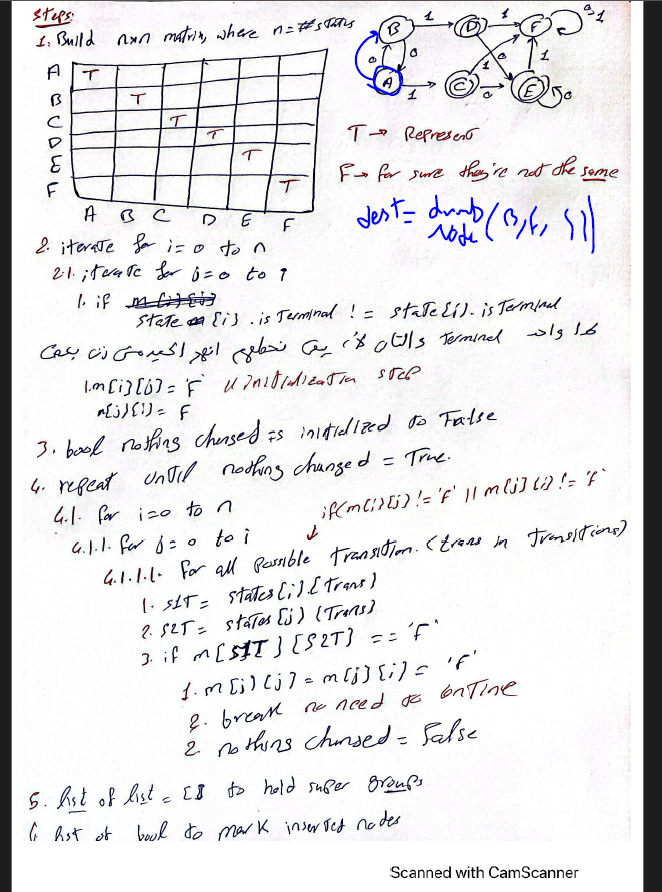
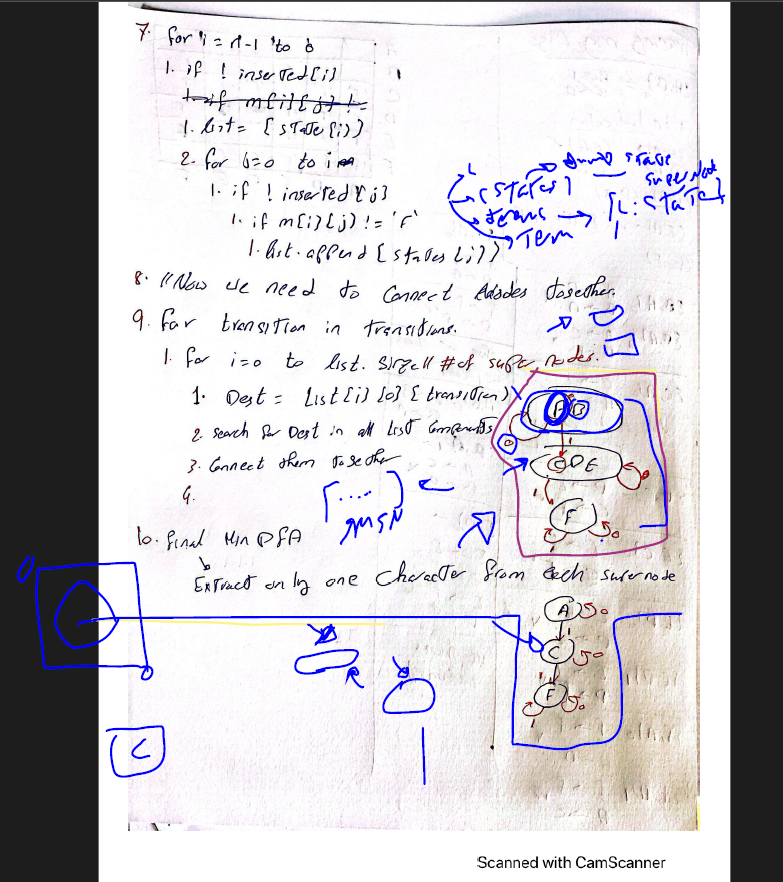
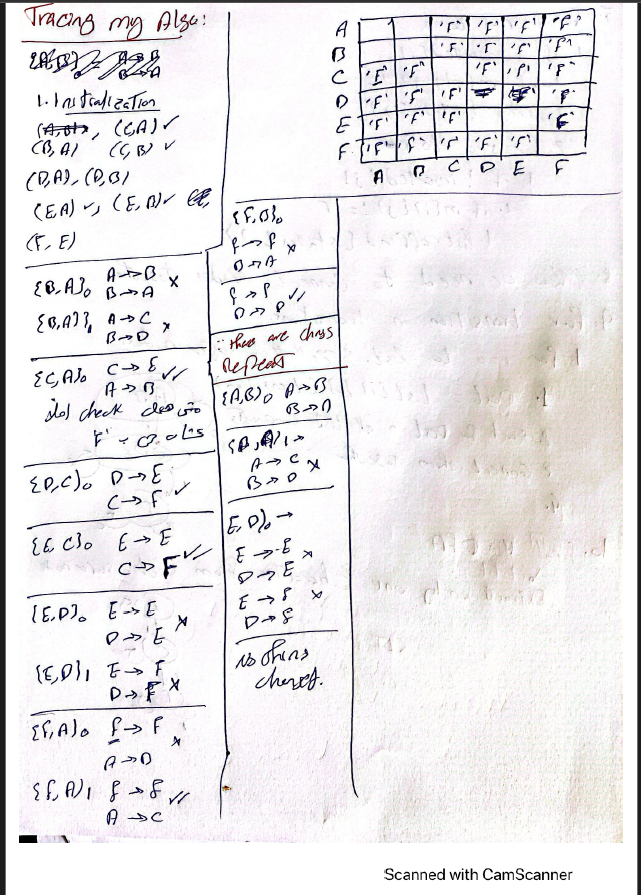

In [424]:
def initializeMat(states:[dumbState]):
    # build nxn matrix, where n is the number of states
    matrix = [['T' for i in range(len(states))] for j in range(len(states))]

    # diffrentiate between terminating, and non terminating variables only.
    for i in range(len(matrix)):
        for j in range(i):
            if states[i].isTerminating != states[j].isTerminating: # if one is terminating, and the other is not, then mark as not same
                matrix[i][j] = 'F'
                matrix[j][i] = 'F'

    return matrix

In [426]:
def convertFromListToMap(listOfTransitions):
    result = {}
    for transition in listOfTransitions:
        key = list(transition.keys())[0]
        value = list(transition.values())[0]
        result[key] = value
    return result



In [427]:

def markUnsimilarStates(matrix, states:[dumbState], transitions, conversionMap):
    '''
        This is a helper function, that is responsible for marking the dissimilar states in the matrix.
        and keep iterating till no changes occur in the matrix.
    '''
    noChangesOccured = False
    convMapKeys = list(conversionMap.keys())
    while (not noChangesOccured):
        noChangesOccured = True
        for i in range(len(matrix)):
            for j in range(i):
               if  matrix[i][j] == 'T' :
                   iTransitions = convertFromListToMap(states[i].transitions)
                   jTransitions = convertFromListToMap(states[j].transitions)
                   # check if two lists content are not the same
                   if len(iTransitions) != len(jTransitions) or sorted([iTransitions.keys()]) != sorted([jTransitions.keys()]):
                          matrix[i][j] = 'F'
                          matrix[j][i] = 'F'
                          noChangesOccured = False
                          continue
                   # check if the transitions are not the same
                   commonTrans = list(iTransitions.keys())
                   commonTrans += list(jTransitions.keys())
                   commonTrans = list(set(commonTrans))

                   for trans in commonTrans:
                   
                       s1T = iTransitions[trans].label
                       s2T = jTransitions[trans].label
                       row = conversionMap.get(s1T, None)
                       col = conversionMap.get(s2T, None)
                       if row is None or col is None:
                           continue
                    #    if (s1T in convMapKeys and s2T in convMapKeys) and  matrix[conversionMap[s1T]][conversionMap[s2T]] == 'F' or matrix[conversionMap[s2T]][conversionMap[s1T]] == 'F': # because order does not matter, so double check on both.
                       if matrix[row][col] == 'F' or matrix[row][col] == 'F': # because order does not matter, so double check on both.
                           matrix[i][j] = 'F'
                           matrix[j][i] = 'F'
                           noChangesOccured = False

In [428]:
def combineSimilarNodes(matrix, states:[dumbState]):
    '''
        After marking the dissimilar nodes, each group which are in the same row and marked T, should be grouped as one super node.
    '''
    # create a list of supernodes
    superNodes = [ ]

    # create a bool matrix, to indicate whether we have inserted this node before in a supernode or not
    inserted = [False for i in range(len(states))]
    for i in range(len(states)):
        if not inserted[i]:
            supernode = superNode([states[i]], states[i].isTerminating, [], states[i].state, states[i].isStarting)
            for j in range(i+1, len(states)):
                if matrix[i][j] == 'T':
                    supernode.addState(states[j])
                    if states[j].isTerminating:
                        supernode.markAsTerminating(True)
                    if states[j].isStarting:
                        supernode.markAsStarting(True)
                    inserted[j] = True
            superNodes.append(supernode)

    return superNodes


In [429]:
def checkIfTheNodeExistsBefore(minimizedDFAList:list[dumbState], sn:dumbState):
    '''
        This is a utility function, which checks if the node exists before in the list or not.
    '''
    # Extract the first state
    firstState = sn
    existBefore = False
    newNode = None

    # Search for the node in the created nodes
    for node in minimizedDFAList:
        if firstState.state == node.state: # exist in the list
            existBefore = True
            newNode = node
            break

    if not existBefore:
        newNode = dumbState(firstState.state, sn.isTerminating, {})
    return newNode

def lookForNode(dest:state, superNodeStates:list[dumbState]):
    '''
        This is a utility function, which searches for a node by label.
    '''
    # extract all the labels of superNodes
    labels = []
    for node in superNodeStates:
        labels.append(node.state)
    # search by labels
    return dest.label in labels

In [461]:
def minimizingSuperNodes(superNodes:list[superNode]) -> list[dumbState]:
    '''
        1. create a list of super nodes which represent the minimized DFA
        2. Iterate over the given superNodes
            1. extract the first state
            2. check if the label of this state exist in the new list
            3. if not create new supernode and initialize it with the properties of the first state
            4. iterate over all transitions
                1. extract the label of the destination
                2. iterate over the list of superNodes
                    1. search for that label in each state of the superNode
                    2. extract the label of the first state of the found superNode
                    3. if exist in the new supernodes list, asign it as the new destination
                    4. else, create new super node with its name, and append it to the list of superNodes

            4. append the new created supernode to the list of superNodes

    '''
    minimizedDFAList:list[dumbState] = []
    for sn in superNodes:
        # Extract the first state
        firstState = sn.states[0]

        # creating or extracting a supernode
        extractedNode = checkIfTheNodeExistsBefore(minimizedDFAList, firstState)

        # getting the transitions of the representative state in the super node.
        snTransitions =  sn.states[0].transitions

        # iterate over its transitions.
        for labelAndTransition in snTransitions:
            label = list(labelAndTransition.keys())[0]
            destDumbNode =  list(labelAndTransition.values())[0]

            # iterate over the given supernodes
            for superNode in superNodes:
              # look for the destination in each super node

              if lookForNode(destDumbNode, superNode.states):
                # extract the representer of target supernode
                repDumbNode = superNode.states[0]

                # check if it was created before, if yes, return the original, else return new state
                newDestination = checkIfTheNodeExistsBefore(minimizedDFAList, repDumbNode)

                # add transition to the extracted node
                extractedNode.addTransition(label, newDestination)

        # Check that the extracted node was not inserted before
        if extractedNode not in minimizedDFAList:
            # insert new minimized Node
            minimizedDFAList.append(extractedNode)
    return minimizedDFAList


In [432]:
def printMinDFA(minimizedDFA): 
    # printing the minimized DFA
    print('Minimized DFA')
    for state in minimizedDFA:
        print(state.state)
        for item in state.transitions:
            print(item, state.transitions[item].state)

In [433]:
def minimizingDFA (states: list[dumbState], transitions):
    #? Checked and Correct
    conversionMap = {
         states[i].state:i for i in range(len(states))
    }
    #? Checked and Correct
    # initialize the matrix.
    matrix = initializeMat(states)

    #! what should I do if two states have different transitions? should I just say that they are not the same and truncate?
    # mark unsimilar states
    markUnsimilarStates(matrix, states, transitions, conversionMap)

    # comibne similar nodes into superNodes
    superNodes = combineSimilarNodes(matrix, states)


    # now we need to connect each super node with the other super node
    minimizedDFA = minimizingSuperNodes(superNodes)
    if(not minimizedDFA):
        return
    # printMinDFA(minimizedDFA)

    return minimizedDFA




In [434]:
# hena bdayet el ghalat, kan el mfrud abd2 a combine l datastructures, kan haysahel 3lya keter :), yala hasal kheir.
def prepareDFA(dfa:DFA):
    '''
        this function converts from hosny's data structure into my data structure.
    '''

    # 1. create a list of states, and transitions
    states = []
    allTransitions = []

    # 2. iterate over all nodes in the dfa
    for node in dfa.transitions:
        
        # 3. extract all needed information
        isTerminating = node.isTerminating
        transitions = node.transitions
        isStart = node == dfa.start
        for key in transitions:
            allTransitions.append(key)
        # 4. create new dumbState, and append it to the list of states
        states.append(dumbState(node.label,isTerminating,transitions, isStart))
    return states, allTransitions

In [435]:
# Utility functions
def DisplayMinimizedDFA(minimizedDFA:list[dumbState]):
    startingNodeLabel = ''
    for node in minimizedDFA: 
        if node.isStarting:
            startingNodeLabel = node.state
            break
    

    with open('minimizedDFA.json', 'w') as f:
        f.write("{\n")
        # assume the first state is the start state
        f.write("\"startingState\":\""+startingNodeLabel+"\",\n")

        for s in minimizedDFA:
            f.write("\""+s.state+"\":\n")
            f.write("   {\n")
            f.write("       \"isTerminatingState\":\""+str(s.isTerminating)+"\"")
            if len(s.transitions)>0:
                f.write(",\n")
            for e in s.transitions:
                f.write("       \""+e+"\":\""+s.transitions[e].state+"\"")
                if e!=list(s.transitions)[-1]:
                    f.write(",\n")
                else:
                    f.write("\n")
            f.write("   }")
            if s!=minimizedDFA[-1]:
                f.write(",\n")
            else:
                f.write("\n")
        f.write("}\n")

def DisplayMinimizedDFAGraph(minimizedDFA:list[dumbState]):
    dot = Digraph(comment='Minimized DFA graph',format='png',graph_attr={ 'rankdir': 'LR'})
    acceptedLabels = []
    for acceptNode in minimizedDFA:
        if acceptNode.isTerminating:
            acceptedLabels.append(acceptNode.state)
    for s in minimizedDFA:
        if s.state in acceptedLabels:
            dot.node(s.state,s.state,shape="doublecircle")
        else:
            dot.node(s.state,s.state,shape="circle")
        for k in s.transitions:
            dot.edge(s.state,s.transitions[k].state,k)
    dot.render('test-output/minimizedDFA.gv', view=True)
    # Utility functions.

def getNoneAtDest(s:state):
    # skip @ edges, till reaching a node.
    closure = set()
    closure.add(s)
    for e in s.Outedges:
        if e.label == "@":
            closure = closure.union(epsilon_closure(e.dist))
    return closure

def extractAllTransitionsFromEdges(edges:list[edge]):
    # for each edge => src, dest, label
    # extract the label and the destination, and add them in a map, and append them to the list 
    transitionsList = [] 
    for e in edges: 
        # if e.label != '@':
        destnations = getNoneAtDest(e.dist)
        transitionsList.append({e.label: destnations})
    return transitionsList

def createDumbNodeFromState(s:state):
    # create a dumbNode from the state
    # extract the label, isTerminating, isStarting, and the transitions
    transMap = {}
    for e in s.Outedges: 
        transMap[e.label] = e.dist 
    # print(transMap)
    return dumbState(s.label, s.isTerminating, transMap, s.isStart)

def addNeighbours (node, transitions): 
    neighbours = getNoneAtDest(node)
    for nei in neighbours: 
        for e in nei.Outedges: 
            if e.label != '@' and e.dist not in neighbours:
                transitions.append({e.label:e.dist})
                
                
def mergeNodes(listOfStates:list[state], currentNode:superNode, transition: str, dfa:DFA):
    # Extract important info 
    isTerminate = False
    isStart = False
    transitions = []
    states = []
    label = ''
    for node in listOfStates:
        if type(node) is superNode:
            continue
        # Debug pos
        isTerminate |= node.isTerminating
        # isStart |= node.isStart
        addNeighbours(node, transitions)
        # transitions += extractAllTransitionsFromEdges(node.Outedges)
        dumbNode = createDumbNodeFromState(node)
        states.append(dumbNode)
        label += node.label

    # now create new super node with the extracted info
    newSuperNode = superNode(states, isTerminate, transitions, label, False)

    # now merge the current node with the new super node
    currentNode.addTransition(transition, newSuperNode) 

    # add the transition in the dfa 
    dfa.transitions.append(newSuperNode)   
    if newSuperNode.isTerminating : 
        dfa.accept.append(newSuperNode)

    return newSuperNode 
    


In [465]:
def mergeDFANodes (dfa): 
    
    genNodesLabels = []
    # iterate over each node in the dfa 
    for sn in dfa.transitions: 
        
        # get all the transitions 
        listOfMaps = sn.transitions
        '''
            create a map 
                key -> trans: 
                value -> list of nodes
        '''
        transitionMap = {}
        nodesLabels = []
        # iterate over the transition lise
        for item in listOfMaps: 
            if (type(item) != dict):
                continue
            transChar = list(item.keys())[0]
            Node = list(item.values())[0] 
            if transChar in transitionMap: 
                transitionMap[transChar].append(Node)
                nodesLabels.append(Node.label)
            else: 
                transitionMap[transChar] = [Node]
                nodesLabels = [Node.label]

        # now lets merge each item in the transition map 
        createdNode = None
        for char,nodesList in transitionMap.items(): 
           if len(nodesList) > 1: 
               createdNode = mergeNodes(nodesList, sn, char,dfa)
               # copy all elements in the nodes LAbel into gen Label 
               
               i = -1
               while i < len (dfa.transitions):
                    i+=1
                    if i >= len(dfa.transitions):
                        break
                    sn = dfa.transitions[i]
                    if sn.label in nodesLabels:
                        dfa.transitions.remove(sn)
                        i -= 1
                    if i < 0:
                        break
                    
                        # continue
               genNodesLabels += nodesLabels
           

            
            
        
        # now for each entry in the transitionMap, we need to delete the edges and nodes from the dfa.transitions
        # and add the new supernode to the dfa.transitions

                        
                    
        
        # now we need to delete previous nodes 
        
        

In [467]:
# This should be the cell in which we add the whole process
def main_function(regex:str):
    # here we apply validation, lexing, and parsing => frontend part
    postfix= fromRegToPostfix(regex)
    print(postfix)
    # print(postfix)
    if postfix == 'Invalid Regex':
        print('Invalid Regex')
        return

    # generating nfa from postfix
    nfa = PostfixToNFA(postfix)
    if (nfa == None):
        return
    nfa.start.isStart = True
    nfa.accept.isTerminating = True
    nfa.display()
    nfa.graph()

    # generating dfa from nfa
    dfa = DFA_from_NFA(nfa)

    # fixing edges
    correctEdgesDirections(dfa.transitions)
    mergeDFANodes(dfa)
    # dfa.display()
    # dfa.graph()

    # preparing dfa to be minimized
    states, transitions = prepareDFA(dfa)

    # minimizing DFA
    minDfa = minimizingDFA(states, transitions)

    # creating the json file
    DisplayMinimizedDFA(minDfa)

    # printing the graph
    DisplayMinimizedDFAGraph(minDfa)
    


### WOHOOH => time to test !

In [468]:
# lw feh *, byrsm sahmen
testcases = [
    # 'a+b*',   # -> fully correct
    # 'a+b',   # -> fully correct
    # 'a*b*ca',  # -> fully correct
    # 'a+|b+',  # -> fully correct
    # '[a-z0-9]32', # -> fully correct
    # '[a-f0-9]32', # -> fully correct
    # 'a*|b*', # -> fully correct
    # '[a-c]*', # fully correct
    # '[abc](d|e|f)', # fully correct
    # '[a-fA-C]', # fully correct
    # 'a+b+a',  # -> fully correct
    # '(a|b)a[ab]', # correct
    # '(a*b)(b?a+)'  # -> fully correct
    # '(7|h|H)osny',  # fully correct
    # 'zizo|(z(u|o)z)',  # fully correct
    # ---------------------------------------------------
    # Elhamdulelaah <3

    '((bashohandes)|(Eng)|TA)(3|O|o)mar (S|s)amir we are done+'
]

for case in testcases:
    print('Testing: ' + case)
    main_function(case) 
    # input('Press Enter to continue...')
    print('-----------------------------')

Testing: ((bashohandes)|(Eng)|TA)(3|O|o)mar (S|s)amir we are done+
calling validation
Passed all test cases 🥂🥳
ba&s&h&o&h&a&n&d&e&s&En&g&|TA&|3O|o|&m&a&r&Ss|&a&m&i&r&w&e&a&r&e&d&o&n&e+&
-----------------------------


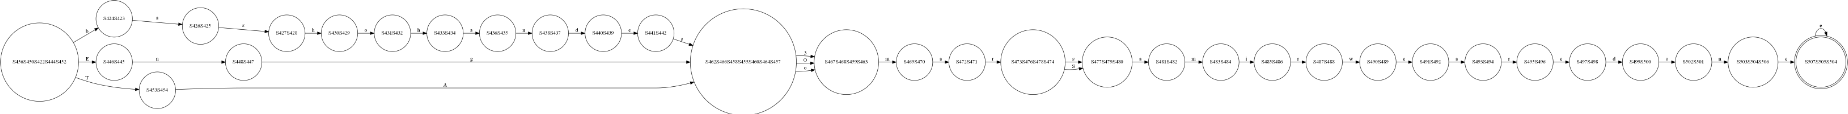

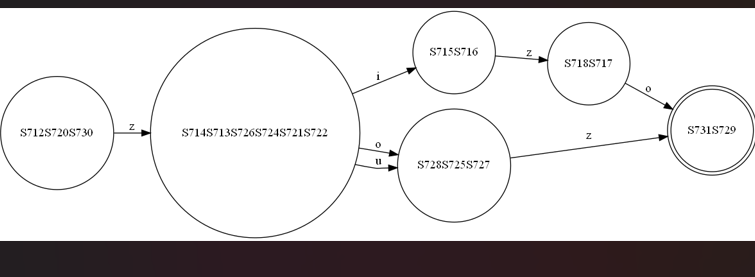
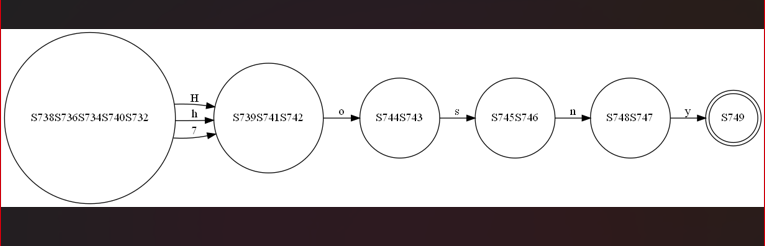

In [472]:
# Testing cell 
regex = input("Enter any regex to test: ")
print(regex)
main_function(regex)

It was a nightmare not an assignment
calling validation
Passed all test cases 🥂🥳
It&w&a&s&a&n&i&g&h&t&m&a&r&e&n&o&t&a&n&a&s&s&i&g&n&m&e&n&t&


### This is one long state machine 🫡

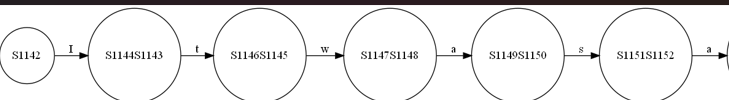
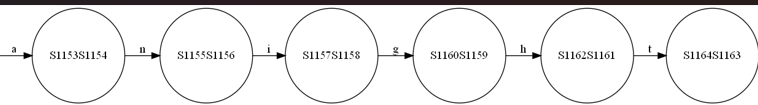
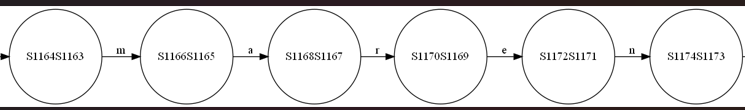
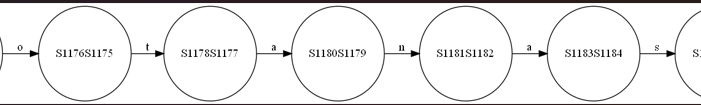
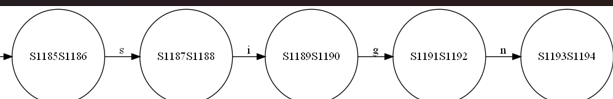
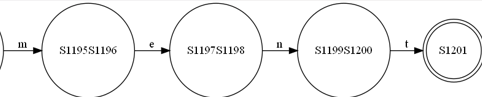








* This was a very long assignment, but in fact it was very challenging and interesting! 💓✅
* Bs omal el project hyb2a 3amel ezaaaaaay! 🥲🥲😭